In [76]:
%matplotlib widget

import os
import numpy as np
import scipy.stats as st
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from numpy.fft import rfft, rfftfreq

from onix.data_tools import get_experiment_data, open_analysis_folder, get_analysis_file_path
from onix.analysis.fitter import Fitter
from onix.helpers import data_identifier, console_bold, present_float

In [73]:
data, headers = get_experiment_data(149)

In [75]:
data["quarto_voltages"]

array([[ 0.006328, -0.016562, -0.014375, ..., -0.003281, -0.013984,
         0.009688],
       [-0.008906, -0.007891,  0.002578, ...,  0.008906, -0.008516,
        -0.014062],
       [-0.018594, -0.000859, -0.000547, ...,  0.001406,  0.000156,
         0.004609],
       ...,
       [-0.009453, -0.014297, -0.008516, ...,  0.003437, -0.01    ,
         0.00875 ],
       [-0.023203, -0.006016, -0.010625, ...,  0.007344,  0.004297,
        -0.006953],
       [-0.010156, -0.000703, -0.016797, ...,  0.003828,  0.007734,
         0.011172]])

In [92]:
ffts = []
for kk in data["quarto_voltages"]:
    ffts.append(rfft(kk))
fft_avgs = np.sqrt(np.average([np.absolute(fft)**2 for fft in ffts], axis=0))
fft_fs = rfftfreq(50000, 2e-6)

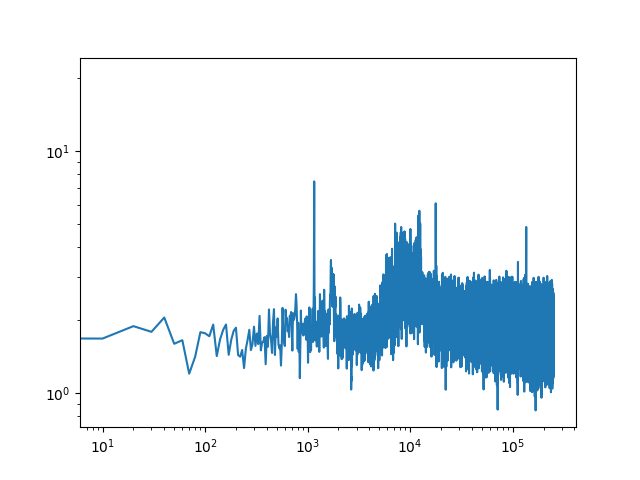

In [93]:
fig, ax = plt.subplots()
ax.plot(fft_fs, fft_avgs)
ax.set_yscale("log")
ax.set_xscale("log")